In [1]:
import os
datadir = '../datasets/kaggle/the-simpsons-characters-dataset/'
os.listdir(datadir)

['annotation.txt',
 'characters_illustration.png',
 'kaggle_simpson_testset',
 'number_pic_char.csv',
 'simpsons_dataset',
 'weights.best.hdf5']

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
datagen = ImageDataGenerator( 
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    rotation_range=40,
    zoom_range = 0.1,
    rescale=1./255,
    validation_split=0.33)

In [6]:
train_generator = datagen.flow_from_directory(
    datadir+'simpsons_dataset',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42, 
    subset="training")
valid_generator = datagen.flow_from_directory(
    directory=datadir+'simpsons_dataset',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42, 
    subset="validation"
)

Found 14048 images belonging to 42 classes.
Found 6885 images belonging to 42 classes.


In [11]:
model = Sequential()

model.add(Conv2D(128, 3, padding='same', activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())
model.add(Dense(42, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 32)        18464     
__________

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [14]:
from keras.callbacks import ModelCheckpoint

In [15]:
model_saver = ModelCheckpoint('../saved_model/simpsons_conv_best.h5',
                             verbose=1, save_best_only=True, save_weights_only=True)

In [16]:
STEPS_PER_EPOCH = train_generator.n // train_generator.batch_size
VALID_STEPS = valid_generator.n // valid_generator.batch_size
model.fit_generator(train_generator,steps_per_epoch=STEPS_PER_EPOCH, epochs=20,
                    callbacks=[model_saver],validation_data=valid_generator,validation_steps=VALID_STEPS)

Epoch 1/20
439/439 [==============================] - 586s 1s/step - loss: 3.0175 - acc: 0.2185 - val_loss: 2.8749 - val_acc: 0.2154

Epoch 00001: val_loss improved from inf to 2.87492, saving model to ../saved_model/simpsons_conv_best.h5
Epoch 2/20
439/439 [==============================] - 186s 423ms/step - loss: 2.4817 - acc: 0.3306 - val_loss: 2.6991 - val_acc: 0.2673

Epoch 00002: val_loss improved from 2.87492 to 2.69915, saving model to ../saved_model/simpsons_conv_best.h5
Epoch 3/20
439/439 [==============================] - 186s 423ms/step - loss: 2.2237 - acc: 0.4136 - val_loss: 2.4196 - val_acc: 0.3657

Epoch 00003: val_loss improved from 2.69915 to 2.41963, saving model to ../saved_model/simpsons_conv_best.h5
Epoch 4/20
439/439 [==============================] - 185s 421ms/step - loss: 2.0080 - acc: 0.4793 - val_loss: 2.8067 - val_acc: 0.3426

Epoch 00004: val_loss did not improve from 2.41963
Epoch 5/20
439/439 [==============================] - 185s 421ms/step - loss: 1.8

In [17]:
from keras.preprocessing.image import img_to_array, load_img

In [39]:
img = load_img(datadir+'kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_12.jpg', target_size=(224,224))
img_arr = img_to_array(img).reshape((1,224,224,3))

In [25]:
indicer = dict([(v,k) for k,v in train_generator.class_indices.items()])
indicer

{0: 'abraham_grampa_simpson',
 1: 'agnes_skinner',
 2: 'apu_nahasapeemapetilon',
 3: 'barney_gumble',
 4: 'bart_simpson',
 5: 'carl_carlson',
 6: 'charles_montgomery_burns',
 7: 'chief_wiggum',
 8: 'cletus_spuckler',
 9: 'comic_book_guy',
 10: 'disco_stu',
 11: 'edna_krabappel',
 12: 'fat_tony',
 13: 'gil',
 14: 'groundskeeper_willie',
 15: 'homer_simpson',
 16: 'kent_brockman',
 17: 'krusty_the_clown',
 18: 'lenny_leonard',
 19: 'lionel_hutz',
 20: 'lisa_simpson',
 21: 'maggie_simpson',
 22: 'marge_simpson',
 23: 'martin_prince',
 24: 'mayor_quimby',
 25: 'milhouse_van_houten',
 26: 'miss_hoover',
 27: 'moe_szyslak',
 28: 'ned_flanders',
 29: 'nelson_muntz',
 30: 'otto_mann',
 31: 'patty_bouvier',
 32: 'principal_skinner',
 33: 'professor_john_frink',
 34: 'rainier_wolfcastle',
 35: 'ralph_wiggum',
 36: 'selma_bouvier',
 37: 'sideshow_bob',
 38: 'sideshow_mel',
 39: 'snake_jailbird',
 40: 'troy_mcclure',
 41: 'waylon_smithers'}

'kent_brockman'

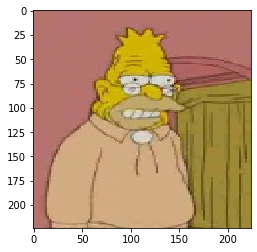

In [40]:
plt.imshow(img)
indicer[model.predict_classes(img_arr).item()]